<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Escreva seu nome aqui.*

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [51]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 22.1MB/s]


In [2]:
# Importação das bibliotecas
import pandas as pd

# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
print(df.head())

         Data  Visitantes Únicos  Sessões  Taxa de Rejeição (%)  \
0  2023-01-01              113.0    126.0             50.496714   
1  2023-01-02               90.0    157.0             49.438007   
2  2023-01-03               92.0    185.0             49.800231   
3  2023-01-04              130.0    206.0             50.251843   
4  2023-01-05              123.0    155.0             48.070931   

   Páginas por Sessão Principais Origens do Tráfego Dispositivos  Eventos  \
0            1.834201                        Direto      Desktop        8   
1            1.955760                        Social      Desktop        5   
2            2.285052                        Direto      Desktop        9   
3            2.325464                          Pago       Mobile        6   
4            2.267006                        Direto      Desktop        6   

   Taxa de Conversão (%)  Tempo Médio de Sessão (minutos)  
0               1.952083                         5.395516  
1             

## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

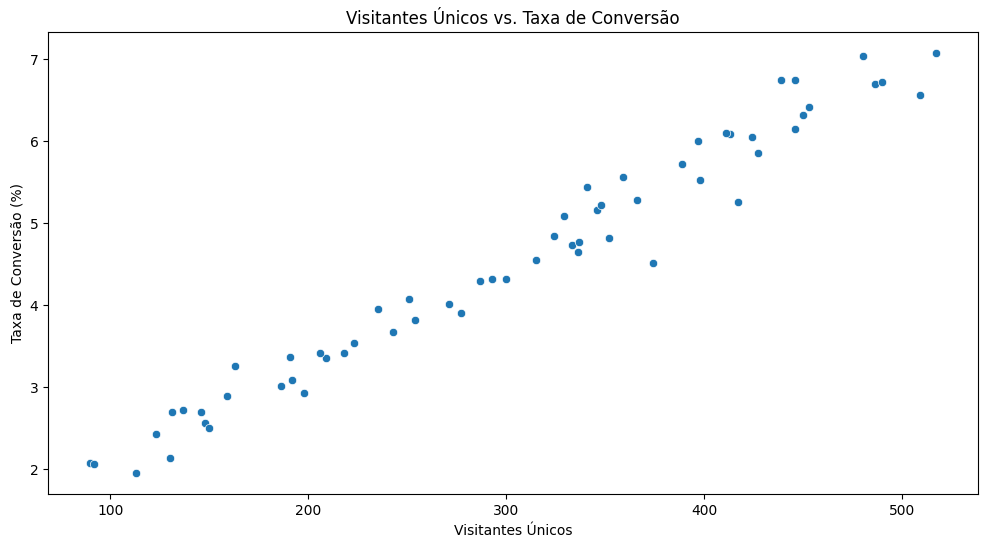

In [5]:
# Visualização de variáveis numéricas
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Visitantes Únicos", y="Taxa de Conversão (%)", data=df)
plt.title("Visitantes Únicos vs. Taxa de Conversão")
plt.show()

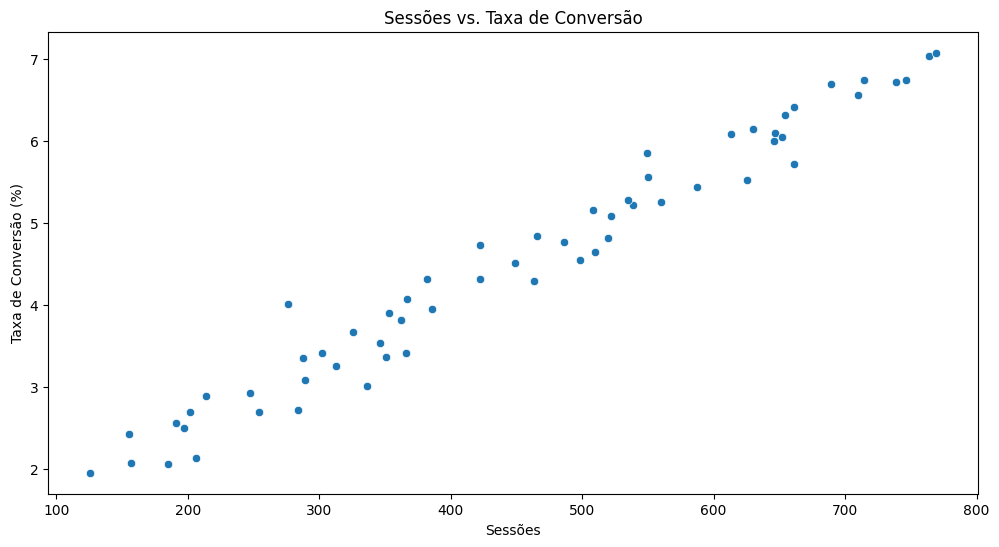

In [6]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Sessões", y="Taxa de Conversão (%)", data=df)
plt.title("Sessões vs. Taxa de Conversão")
plt.show()

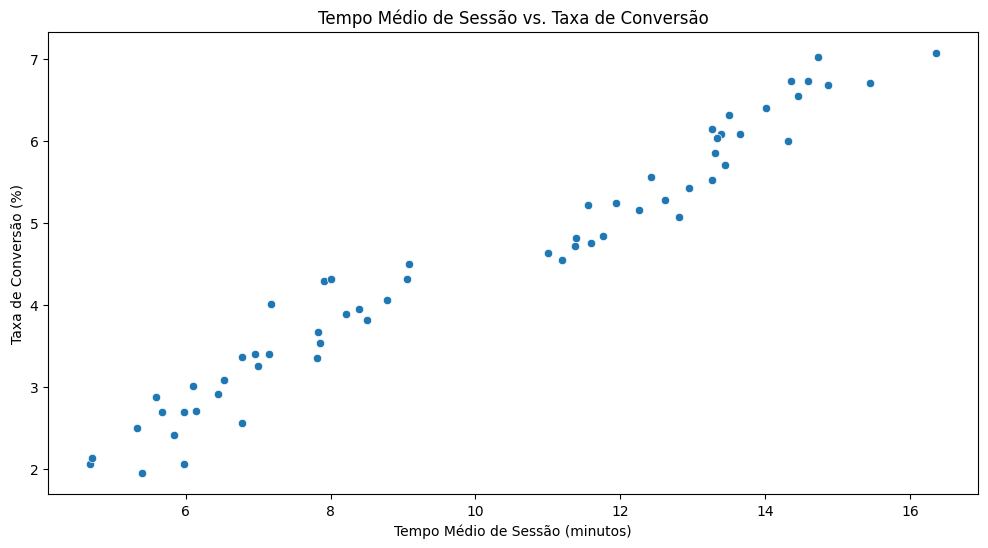

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Tempo Médio de Sessão (minutos)", y="Taxa de Conversão (%)", data=df)
plt.title("Tempo Médio de Sessão vs. Taxa de Conversão")
plt.show()

In [13]:
# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')

In [19]:
# Identificar colunas com valores não numéricos
non_numeric_cols = df.select_dtypes(include=['object']).columns

# Tratar colunas com valores não numéricos
for col in non_numeric_cols:
    if col != 'Data':
        df[col] = df[col].fillna(0)
        df[col] = pd.to_numeric(df[col], errors='coerce')

df['Data'] = pd.to_datetime(df['Data'])
df

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,NaN,NaN,8,1.952083,5.395516
1,2023-01-02,90.0,157.0,49.438007,1.955760,NaN,NaN,5,2.066180,4.680899
2,2023-01-03,92.0,185.0,49.800231,2.285052,NaN,NaN,9,2.058858,5.972584
3,2023-01-04,130.0,206.0,50.251843,2.325464,NaN,NaN,6,2.134617,4.705854
4,2023-01-05,123.0,155.0,48.070931,2.267006,NaN,NaN,6,2.420236,5.835801
5,2023-01-06,148.0,191.0,47.647219,2.362449,NaN,NaN,9,2.559353,6.773194
6,2023-01-07,150.0,197.0,49.036840,2.662313,NaN,NaN,4,2.501274,5.318291
7,2023-01-08,146.0,202.0,47.801333,2.356262,NaN,NaN,9,2.693574,5.666004
8,2023-01-09,137.0,284.0,46.140695,2.651792,NaN,NaN,2,2.714130,6.134571
9,2023-01-10,131.0,254.0,46.729001,2.569731,NaN,NaN,10,2.698200,5.968601


Index(['Data', 'Visitantes Únicos', 'Sessões', 'Taxa de Rejeição (%)',
       'Páginas por Sessão', 'Principais Origens do Tráfego', 'Dispositivos',
       'Eventos', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)'],
      dtype='object')


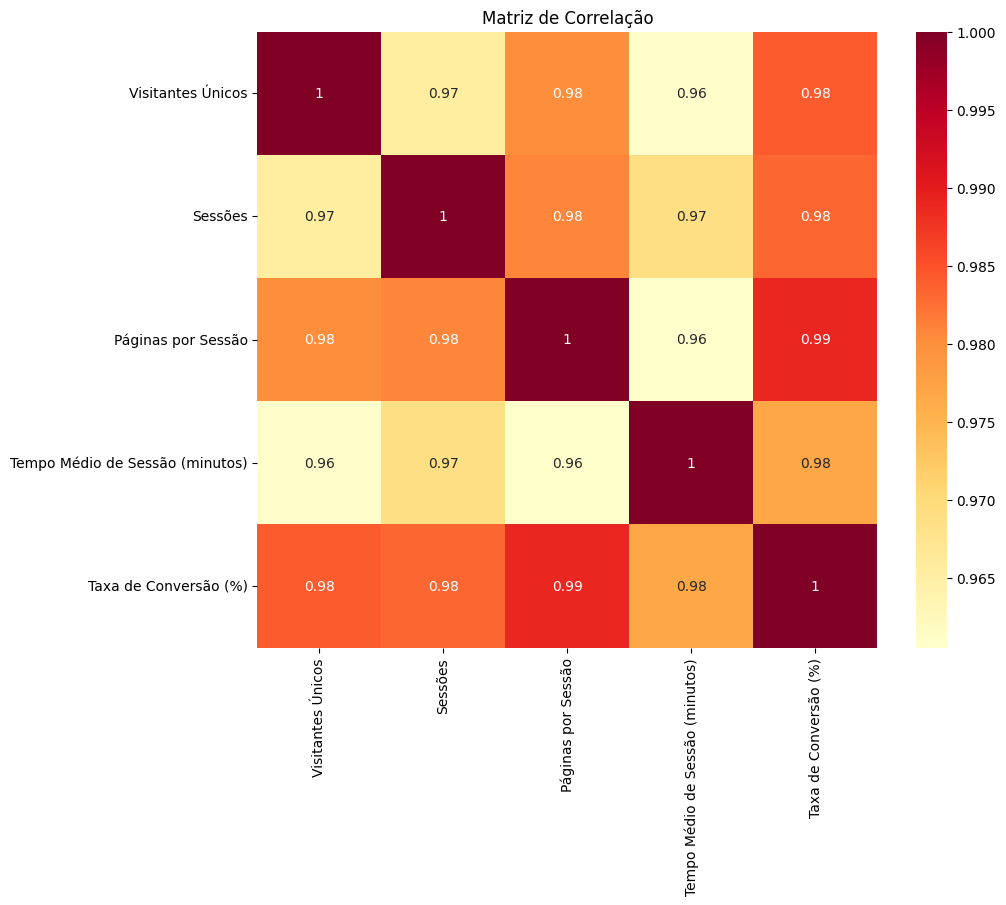

In [45]:
# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')

# Verificar as colunas disponíveis
print(df.columns)

# Identificar colunas relevantes para a análise de correlação
relevant_cols = ['Visitantes Únicos', 'Sessões', 'Páginas por Sessão', 'Tempo Médio de Sessão (minutos)', 'Taxa de Conversão (%)']

# Calcular a matriz de correlação apenas com as colunas relevantes
corr_matrix = df[relevant_cols].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Matriz de Correlação')
plt.show()


### Questão 2


**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [40]:
# Carregando os dados
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
df

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516
1,2023-01-02,90.0,157.0,49.438007,1.955760,Social,Desktop,5,2.066180,4.680899
2,2023-01-03,92.0,185.0,49.800231,2.285052,Direto,Desktop,9,2.058858,5.972584
3,2023-01-04,130.0,206.0,50.251843,2.325464,Pago,Mobile,6,2.134617,4.705854
4,2023-01-05,123.0,155.0,48.070931,2.267006,Direto,Desktop,6,2.420236,5.835801
5,2023-01-06,148.0,191.0,47.647219,2.362449,Orgânico,Mobile,9,2.559353,6.773194
6,2023-01-07,150.0,197.0,49.036840,2.662313,Direto,Mobile,4,2.501274,5.318291
7,2023-01-08,146.0,202.0,47.801333,2.356262,Pago,Desktop,9,2.693574,5.666004
8,2023-01-09,137.0,284.0,46.140695,2.651792,Social,Desktop,2,2.714130,6.134571
9,2023-01-10,131.0,254.0,46.729001,2.569731,Social,Desktop,10,2.698200,5.968601


In [41]:
# Definir o modelo matemático
def calculate_conversion_rate(visitors, sessions, avg_session_time):
    return 0.02 * visitors + 0.03 * sessions + 0.05 * avg_session_time

In [42]:
# Determinar as distribuições de probabilidade
visitors_mean = df['Visitantes Únicos'].mean()
visitors_std = df['Visitantes Únicos'].std()

sessions_mean = df['Sessões'].mean()
sessions_std = df['Sessões'].std()

avg_session_time_mean = df['Tempo Médio de Sessão (minutos)'].mean()
avg_session_time_std = df['Tempo Médio de Sessão (minutos)'].std()

# Simulação de Monte Carlo
num_iterations = 10000
conversion_rates = []

for _ in range(num_iterations):
    # Gerar amostras aleatórias
    visitors_sample = np.random.normal(visitors_mean, visitors_std)
    sessions_sample = np.random.normal(sessions_mean, sessions_std)
    avg_session_time_sample = np.random.normal(avg_session_time_mean, avg_session_time_std)

    # Calcular a taxa de conversão
    conversion_rate = calculate_conversion_rate(visitors_sample, sessions_sample, avg_session_time_sample)
    conversion_rates.append(conversion_rate)

Média da taxa de conversão: 1991.26%
Desvio padrão da taxa de conversão: 596.82%


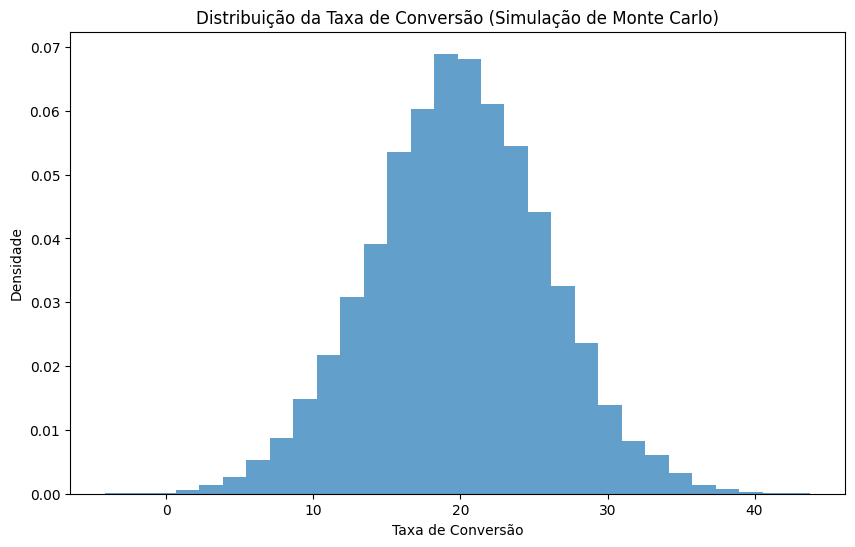

In [43]:
# Análise dos resultados
conversion_rate_mean = np.mean(conversion_rates)
conversion_rate_std = np.std(conversion_rates)

print(f"Média da taxa de conversão: {conversion_rate_mean:.2%}")
print(f"Desvio padrão da taxa de conversão: {conversion_rate_std:.2%}")

# Plotar a distribuição da taxa de conversão
plt.figure(figsize=(10, 6))
plt.hist(conversion_rates, bins=30, density=True, alpha=0.7)
plt.xlabel("Taxa de Conversão")
plt.ylabel("Densidade")
plt.title("Distribuição da Taxa de Conversão (Simulação de Monte Carlo)")
plt.show()

Atraves do gráfico podemos perceber que a taxa de conversao está bastante localizada entre 10-30. Atraves da formulá matemática média da taxa de conversão: taxa de conversão = 0.02 x Visitantes Únicos + 0.03 x Sessões o resultado de  foi 1998.21% (acredito que seja de 20%) e um desvio padrão de 593.76%, o que sugere que o modelo matemático ta ruim kkkkkkkkkkkkkkkkkkkkkkkkkkkk, mas é isso o que deu  👍( ͡❛ ͜ʖ ͡❛👍)

### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.